In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('E:\\data Science\\datasets\\Breastcancer.csv',index_col=0)

In [3]:
data.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign


In [4]:
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [5]:
data.dtypes

Id                  int64
Cl.thickness        int64
Cell.size           int64
Cell.shape          int64
Marg.adhesion       int64
Epith.c.size        int64
Bare.nuclei         int64
Bl.cromatin         int64
Normal.nucleoli     int64
Mitoses             int64
Class              object
dtype: object

In [6]:
data.shape

(683, 11)

In [7]:
data['Class'] = np.where(data.Class=='benign',0,1)

In [8]:
df = data.copy()

In [9]:
var = df.drop(['Id'],axis=1)
for col in var:
    print('number of unique values in',col,':',data[col].unique(),'\n')

number of unique values in Cl.thickness : [ 5  3  6  4  8  1  2  7 10  9] 

number of unique values in Cell.size : [ 1  4  8 10  2  3  7  5  6  9] 

number of unique values in Cell.shape : [ 1  4  8 10  2  3  5  6  7  9] 

number of unique values in Marg.adhesion : [ 1  5  3  8 10  4  6  2  9  7] 

number of unique values in Epith.c.size : [ 2  7  3  1  6  4  5  8 10  9] 

number of unique values in Bare.nuclei : [ 1 10  2  4  3  9  7  5  8  6] 

number of unique values in Bl.cromatin : [ 3  9  1  2  4  5  7  8  6 10] 

number of unique values in Normal.nucleoli : [ 1  2  7  4  5  3 10  6  9  8] 

number of unique values in Mitoses : [ 1  5  4  2  3  7 10  8  6] 

number of unique values in Class : [0 1] 



# DATA VISUALISATION

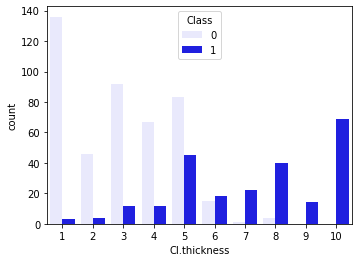

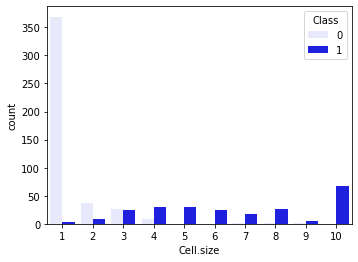

In [10]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.countplot(df['Cl.thickness'],hue= df.Class,color='b',ax=ax)
# from this plot till Cl.thickness =5 count of class of cancer for 'bening' is more and after 5 it is more for 'malignant'.

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(122)
sns.countplot(df['Cell.size'],hue= df.Class,color='b',ax=ax)

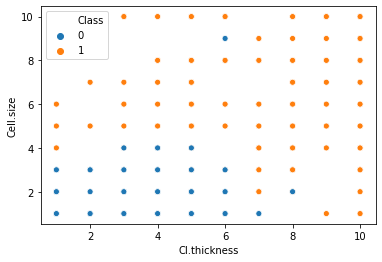

In [11]:
sns.scatterplot(df['Cl.thickness'],df['Cell.size'],hue=df.Class,color='g')

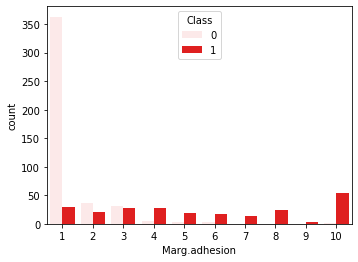

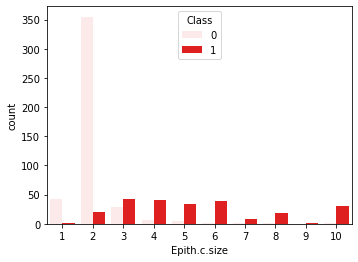

In [12]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.countplot(df['Marg.adhesion'],hue= df.Class,color='r',ax=ax)

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(122)
sns.countplot(df['Epith.c.size'],hue= df.Class,color='r',ax=ax)

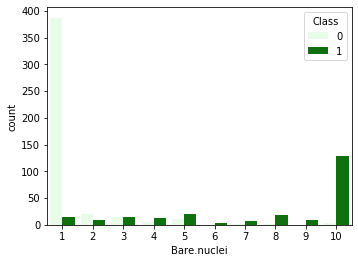

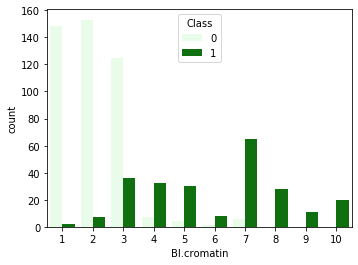

In [13]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.countplot(df['Bare.nuclei'],hue= df.Class,color='g',ax=ax)
# from this plot till Cl.thickness =5 count of class of cancer for 'bening' is more and after 5 it is more for 'malignant'.

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(122)
sns.countplot(df['Bl.cromatin'],hue= df.Class,color='g',ax=ax)

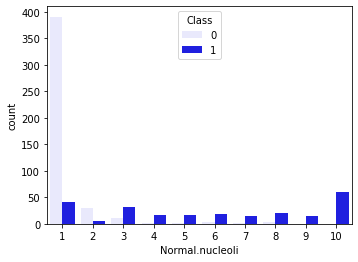

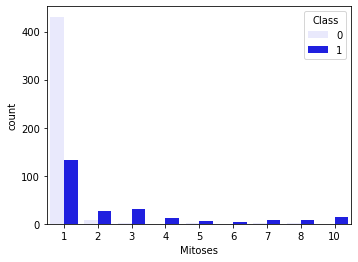

In [14]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.countplot(df['Normal.nucleoli'],hue= df.Class,color='b',ax=ax)
# from this plot till Cl.thickness =5 count of class of cancer for 'bening' is more and after 5 it is more for 'malignant'.

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(122)
sns.countplot(df['Mitoses'],hue= df.Class,color='b',ax=ax)

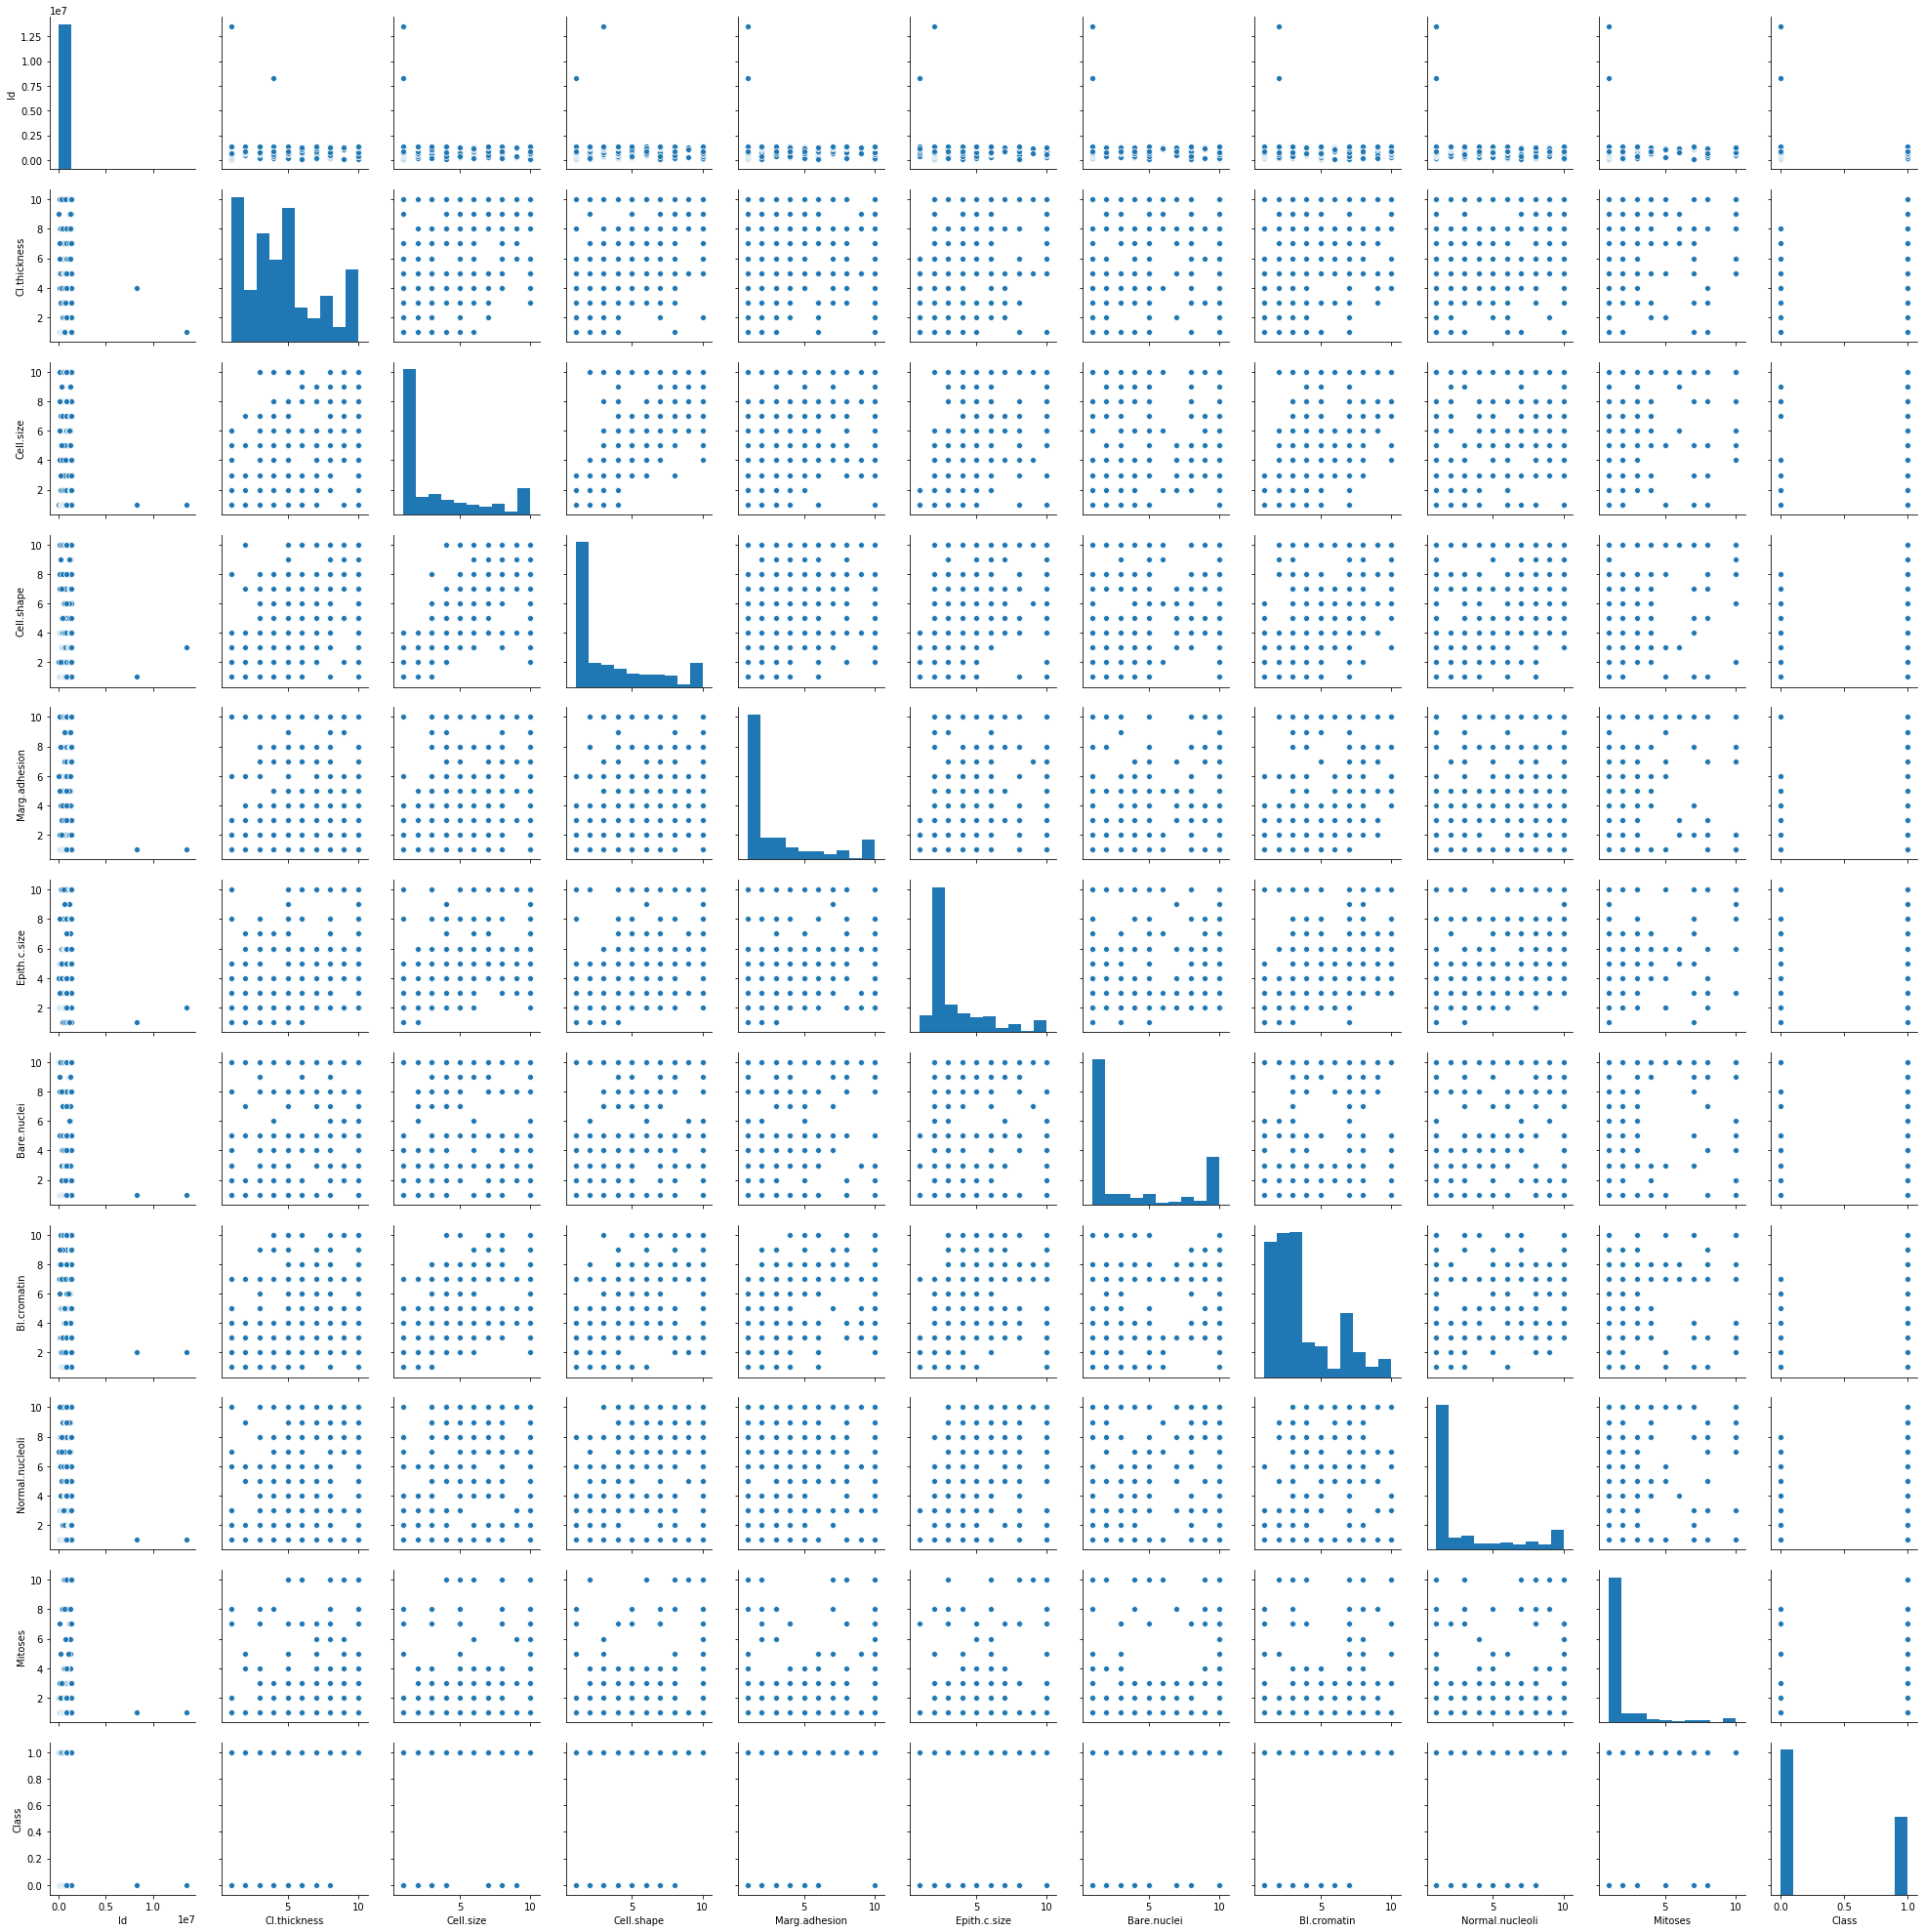

In [15]:
sns.pairplot(data)

## Standardizing the data to scale

In [16]:
x=data.drop(['Id','Class'],axis=1)

In [17]:
y = data.Class

In [18]:
Scaled = StandardScaler().fit(x)

In [19]:
Scaled_data = Scaled.transform(x)

In [20]:
Scaled_data

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [21]:
Scaled_data.shape

(683, 9)

# apply PCA

Text(0, 0.5, 'variance explained')

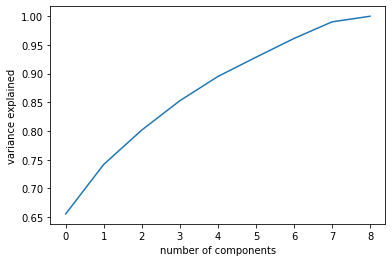

In [22]:
pca = PCA().fit(Scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance explained')

In [23]:
new_pca = PCA(n_components=4)

In [24]:
new_pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = new_pca.transform(Scaled_data)

In [26]:
x_pca

array([[-1.47017124, -0.10427315, -0.56568529, -0.03195934],
       [ 1.44204641, -0.57014143,  0.23660094, -0.47814975],
       [-1.59247769, -0.07611987,  0.0488577 , -0.09238804],
       ...,
       [ 3.78926071, -0.14220878,  0.66214439,  2.49613296],
       [ 2.24000695, -1.09128677,  1.03189011,  0.67864057],
       [ 2.63246243, -1.18469814,  1.10489436,  0.40610131]])

In [27]:
x_pca.shape

(683, 4)

In [28]:
type(x_pca)

numpy.ndarray

In [29]:
new_pca.explained_variance_ratio_

array([0.65549993, 0.08621632, 0.05991692, 0.05106972])

Text(0, 0.5, 'variance explained')

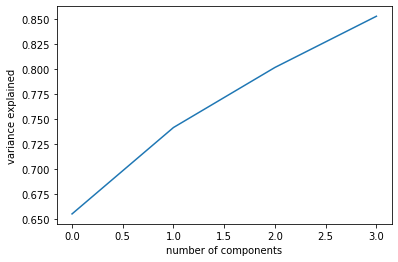

In [30]:
var1=np.cumsum(new_pca.explained_variance_ratio_)
plt.plot(var1)
plt.xlabel('number of components')
plt.ylabel('variance explained')

# applying ML algorithm in this case Logistic Regression.

In [31]:
#  first we will convert the x_pca into dataframe
x_pca_df = pd.DataFrame(data=x_pca,columns=['pca1','pca2','pca3','pca4'])

In [32]:
x_pca_df.head()

,pca1,pca2,pca3,pca4
0,-1.470171,-0.104273,-0.565685,-0.031959
1,1.442046,-0.570141,0.236601,-0.478150
2,-1.592478,-0.076120,0.048858,-0.092388
3,1.479812,-0.528452,-0.603048,1.410827
4,-1.344862,-0.090719,0.029997,-0.338284


In [33]:
# we will add the target variable of class to the data frame
x_pca_df['Cancer_name'] = y

In [34]:
print(x_pca_df.head(),'\n')
print(x_pca_df.shape)

       pca1      pca2      pca3      pca4  Cancer_name
0 -1.470171 -0.104273 -0.565685 -0.031959          NaN
1  1.442046 -0.570141  0.236601 -0.478150          0.0
2 -1.592478 -0.076120  0.048858 -0.092388          0.0
3  1.479812 -0.528452 -0.603048  1.410827          0.0
4 -1.344862 -0.090719  0.029997 -0.338284          0.0 

(683, 5)


In [35]:
x_pca_df.isna().sum()

pca1            0
pca2            0
pca3            0
pca4            0
Cancer_name    17
dtype: int64

In [36]:
x_pca_df.Cancer_name.value_counts()

0.0    431
1.0    235
Name: Cancer_name, dtype: int64

In [37]:
x_pca_df.Cancer_name.fillna('0',inplace=True)

In [38]:
print(x_pca_df.head())
print('\n')
print(x_pca_df.isna().sum())

       pca1      pca2      pca3      pca4 Cancer_name
0 -1.470171 -0.104273 -0.565685 -0.031959           0
1  1.442046 -0.570141  0.236601 -0.478150           0
2 -1.592478 -0.076120  0.048858 -0.092388           0
3  1.479812 -0.528452 -0.603048  1.410827           0
4 -1.344862 -0.090719  0.029997 -0.338284           0


pca1           0
pca2           0
pca3           0
pca4           0
Cancer_name    0
dtype: int64


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
X = x_pca_df.drop(['Cancer_name'],axis=1)

In [41]:
Y = x_pca_df.Cancer_name

In [42]:
Y=Y.astype('int')

In [43]:
log_model = LogisticRegression()
kfold = KFold(n_splits=10,random_state=0)
result = cross_val_score(log_model,X,Y,scoring='accuracy',cv=kfold)

C:\Users\dpzsony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [44]:
result.mean()

0.6562446717817562